In [8]:
from br_fft import bifrost_fft as brft

In [9]:
dd = brft.FFTData(file_root = 'cb10f', fdir = '/net/opal/Volumes/Amnesia/mpi3drun/Granflux')

In [10]:
transformed = dd.get_fft('alf', snap = [430, 431, 432], iix = 5, iiy = 20)

In [11]:
transformed.keys()

dict_keys(['freq', 'ftCube'])

In [12]:
dd.run_gpu() # to use GPU
dd.run_gpu(False) # to stop use of GPU

In [13]:
usingBlocks = dd.get_fft('bx', snap = [400, 401, 402], numBlocks = 5)

In [14]:
usingThreads = dd.get_fft('bx', snap = [400, 401, 402], numThreads = 10)

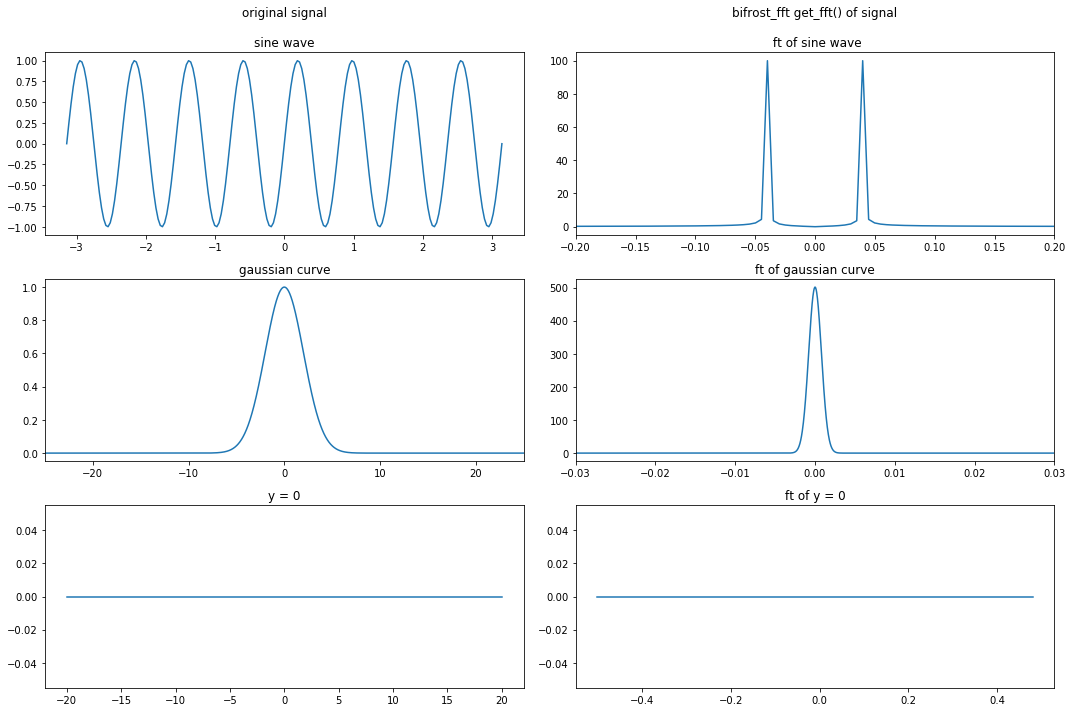

In [15]:
import numpy as np
import helita.sim.cstagger
from helita.sim.bifrost import BifrostData, Rhoeetab, read_idl_ascii
from helita.sim.bifrost_fft import FFTData
import matplotlib.pyplot as plt

# note: this calls bifrost_fft from user, not /sanhome

dd = FFTData(file_root='cb10f',
             fdir='/net/opal/Volumes/Amnesia/mpi3drun/Granflux')

# test 1: ft of y = sin(8x)
x = np.linspace(-np.pi, np.pi, 201)
dd.preTransform = np.sin(8 * x)
dd.freq = np.fft.fftshift(np.fft.fftfreq(np.size(x)))
dd.run_gpu(False)
# preTransform is already set
tester = dd.get_fft('not a real var', snap='test')
fig = plt.figure(figsize=(15,10))

numC = 3
numR = 2

# plotting original sin signal
ax0 = fig.add_subplot(numC, numR, 1)
ax0.plot(x, dd.preTransform)
ax0.set_title('original signal' + '\n\nsine wave')

# plotting transformation sin signal
ax1 = fig.add_subplot(numC, numR, 2)
ax1.plot(tester['freq'], tester['ftCube'])
ax1.set_title('bifrost_fft get_fft() of signal' + '\n\n ft of sine wave')
ax1.set_xlim(-.2, .2)

# test 2: ft of gaussian curve
n = 30000  # Number of data points
dx = .01  # Sampling period (in meters)
x = dx*np.linspace(-n/2, n/2, n)  # x coordinates

stanD = 2  # standard deviation
dd.preTransform = np.exp(-0.5 * (x/stanD)**2)

# plotting original gaussian signal
ax2 = fig.add_subplot(numC, numR, 3)
ax2.plot(x, dd.preTransform)
ax2.set_xlim(-25, 25)
ax2.set_title('gaussian curve')

# plotting transformation of gaussian signal
dd.freq = np.fft.fftshift(np.fft.fftfreq(np.size(x)))
ft = dd.get_fft('not a real var', snap='test')  # preTransform is already set
ax3 = fig.add_subplot(numC, numR, 4)
ax3.plot(ft['freq'], ft['ftCube'])
ax3.set_xlim(-.03, .03)
ax3.set_title('ft of gaussian curve')

# test 3: ft of y = 0
# plotting original horizontal line
x = np.linspace(-20, 20, 50)
dd.preTransform = [0] * 50
ax4 = fig.add_subplot(numC, numR, 5)
ax4.plot(x, dd.preTransform)
ax4.set_title('y = 0')

# plotting transformed signal
dd.freq = np.fft.fftshift(np.fft.fftfreq(np.size(x)))
ft = dd.get_fft('not a real var', snap='test')  # preTransform is already set
ax5 = fig.add_subplot(numC, numR, 6)
ax5.plot(ft['freq'], ft['ftCube'])
ax5.set_title('ft of y = 0')

plt.tight_layout()
plt.show()

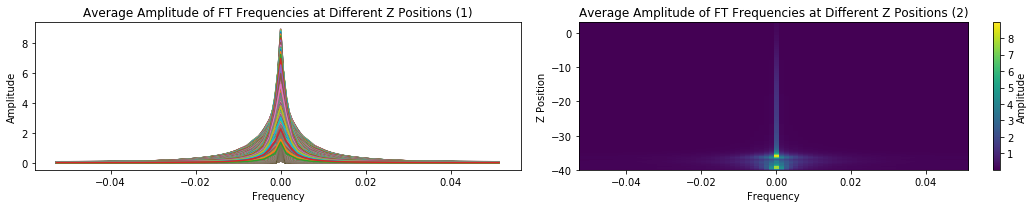

In [22]:
import numpy as np
import helita.sim.cstagger
from helita.sim.bifrost import BifrostData, Rhoeetab, read_idl_ascii
from helita.sim.bifrost_fft import FFTData
import matplotlib.pyplot as plt

snaps = np.arange(280, 360)
v = 'bx'

dd = FFTData(file_root='l2d90x40r_it',
             fdir='/net/opal/Volumes/Amnesia/mpi3drun/2Druns/genohm/rain/l2d90x40r/')

# getting ft
transformed = dd.get_fft(v, snaps)
ft = transformed['ftCube']
freq = transformed['freq']
zaxis = dd.z

# making empty array to later contain the avergaes for each z position
zstack = np.empty([np.size(freq), np.shape(ft)[1]])
# filling ztack with average ft for each (x,y) in each z level
for k in range(0, np.shape(ft)[1]):
    avg = np.average(ft[:, k, :], axis=(0))
    zstack[:, k] = avg

# preparing plots
fig = plt.figure(figsize = (15, 3))
numC = 1
numR = 2

# ploting freq vs amp with multiple lines (1 for each z position)
ax0 = fig.add_subplot(numC, numR, 1)
ax0.plot(freq, zstack)
ax0.set_xlabel('Frequency')
ax0.set_ylabel('Amplitude')
ax0.set_title(
    'Average Amplitude of FT Frequencies at Different Z Positions (1)')
ax0.set_aspect('auto')

# plotting amp at different freq & z with image
ax1 = fig.add_subplot(numC, numR, 2)
im1 = ax1.imshow(zstack.transpose(), extent=[freq[0], freq[-1], zaxis[0], zaxis[-1]])
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Z Position')
ax1.set_title(
    'Average Amplitude of FT Frequencies at Different Z Positions (2)')
ax1.set_aspect('auto')
c1 = fig.colorbar(im1, ax = ax1)
c1.set_label('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
from br_uvotrt import bifrost_uvotrt as br_uvt  

# loading the class
brv=br_uvt.UVOTRTData('en024031_emer3.0str',snap=260)

# saving a VDEM cube using cuda code and saving the data in an npz file
brv.vdem_cuda(save_vdem='test',tg_axis=np.linspace(4.7,7.5,15),vel_axis=np.linspace(-40,40,41),zcut=0.0) 

# calculating spectral prifles using the cuda code (depends on br_cuda and br_intcu)
synprof =  brv.get_intny('fe_8_108.073')     

In [ ]:
from br_topo import bifrost_topology as bt  

# loading the class
brv=bt.TopologyData('en024031_emer3.0str',snap=260)

# calculating factor q (depends on br_topocu)
var=brv.get_topology('qfac')